In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns

N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
k = 99
T = 1
C_list = []
for Z in epsilons:
    S_T = S_0*np.exp((r-0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z)
    C = max(np.exp(-r*T)*(k - S_T), 0)
    C_list.append(C)
    
mean = np.mean(C_list)
S_E = np.std(C_list) / np.sqrt(N)
higer_confidence_intrval_95 = mean + S_E * 0.05
lower_confidence_intrval_95 = mean - S_E * 0.05

print(mean, S_E)


sns.distplot(C_list, kde=True, rug=False);
plt.show()
print(C_list) 
    

4.822876195726903 0.025356669750071927


AttributeError: module 'matplotlib' has no attribute 'show'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-p

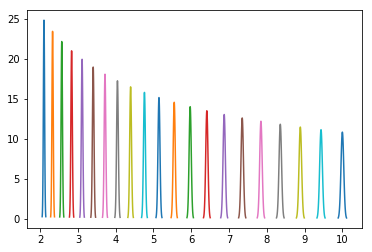

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math


def monte_carlo(k, sigma):
    

    C_list = []
    for Z in epsilons:
        S_T = S_0*np.exp((r-0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z)
        C = max(np.exp(-r*T)*(k - S_T), 0)
        C_list.append(C)

    mean = np.mean(C_list)
    S_E = np.std(C_list) / np.sqrt(N)
    higer_confidence_intrval_95 = mean + (S_E * 1.96)
    lower_confidence_intrval_95 = mean - (S_E * 1.96)
    return mean, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95



Ks = np.linspace(90 , 110, 21)
for K in Ks:
    Ks = np.linspace(90 , 110, 21)
    mean, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95 = monte_carlo(K, sigma)
#     print(mean, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95)

    x = np.linspace(mean - 3*S_E, mean + 3*S_E, 100)
    plt.plot(x,mlab.normpdf(x, mean, S_E))
plt.show()



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


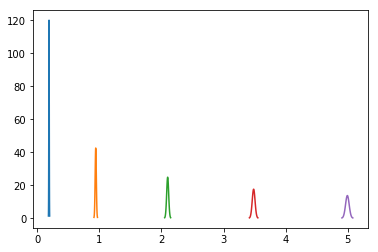

In [56]:
sigmas = np.linspace(0.10 , 0.30, 5)
for sigma in sigmas:
    Ks = np.linspace(90 , 110, 21)
    mean, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95 = monte_carlo(K, sigma)
#     print(mean, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95)

    x = np.linspace(mean - 3*S_E, mean + 3*S_E, 100)
    plt.plot(x,mlab.normpdf(x, mean, S_E))
plt.show()

# 2


In [ ]:
from scipy.stats import norm

N = 100000
epsilons = np.random.randn(N)
S_0 = 100
r= 0.06
sigma = 0.2
K = 99
T = 1
def Black_S_delta():

    t = 0

    d1 = (np.log(S_0/K) + (r + 0.5*sigma**2) * (T - t)) / (sigma*np.sqrt(T - t))
    BS_delta = norm.cdf(-1*d1)
    return BS_delta

def monte_carlo_bump(k, sigma, e):
    
    print(len(epsilons))
    delta_list = []
    for Z in epsilons:
        
        S_T = S_0*np.exp((r-0.5*(sigma**2))*T+sigma*np.sqrt(T)*Z)
        
        S_T_hat = S_T + e
        C = max(np.exp(-r*T)*(k - S_T), 0)
        C_hat = max(np.exp(-r*T)*(k - S_T_hat), 0)
#         print(C_hat, C)
        delta = (C_hat - C)/e
        delta_list.append(delta)

    mean = np.mean(delta_list)
#     print(mean)
#     print(mean)

    
    return mean

E = [0.1, 0.3, 0.5]
Ns = [10**4 , 10**5 , 10**6, 10**7]
print(Ns)
print(E)

analytical_delta = Black_S_delta()
print(analytical_delta, "analytical_delta")


for e in E:
    for N in Ns:
        epsilons = np.random.randn(int(N))
        mean_delta = monte_carlo_bump(K, sigma, e)
        
        relative_error = np.abs(mean_delta - analytical_delta)/analytical_delta
        print(relative_error)
        
    #     print(mean, S_E, higer_confidence_intrval_95, lower_confidence_intrval_95)


[10000, 100000, 1000000, 10000000]
[0.1, 0.3, 0.5]
0.3262644882651039 analytical_delta
10000
2.1568931841579335
100000
2.152082191340537
1000000
2.153861810663613
10000000
